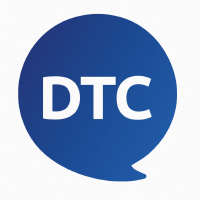

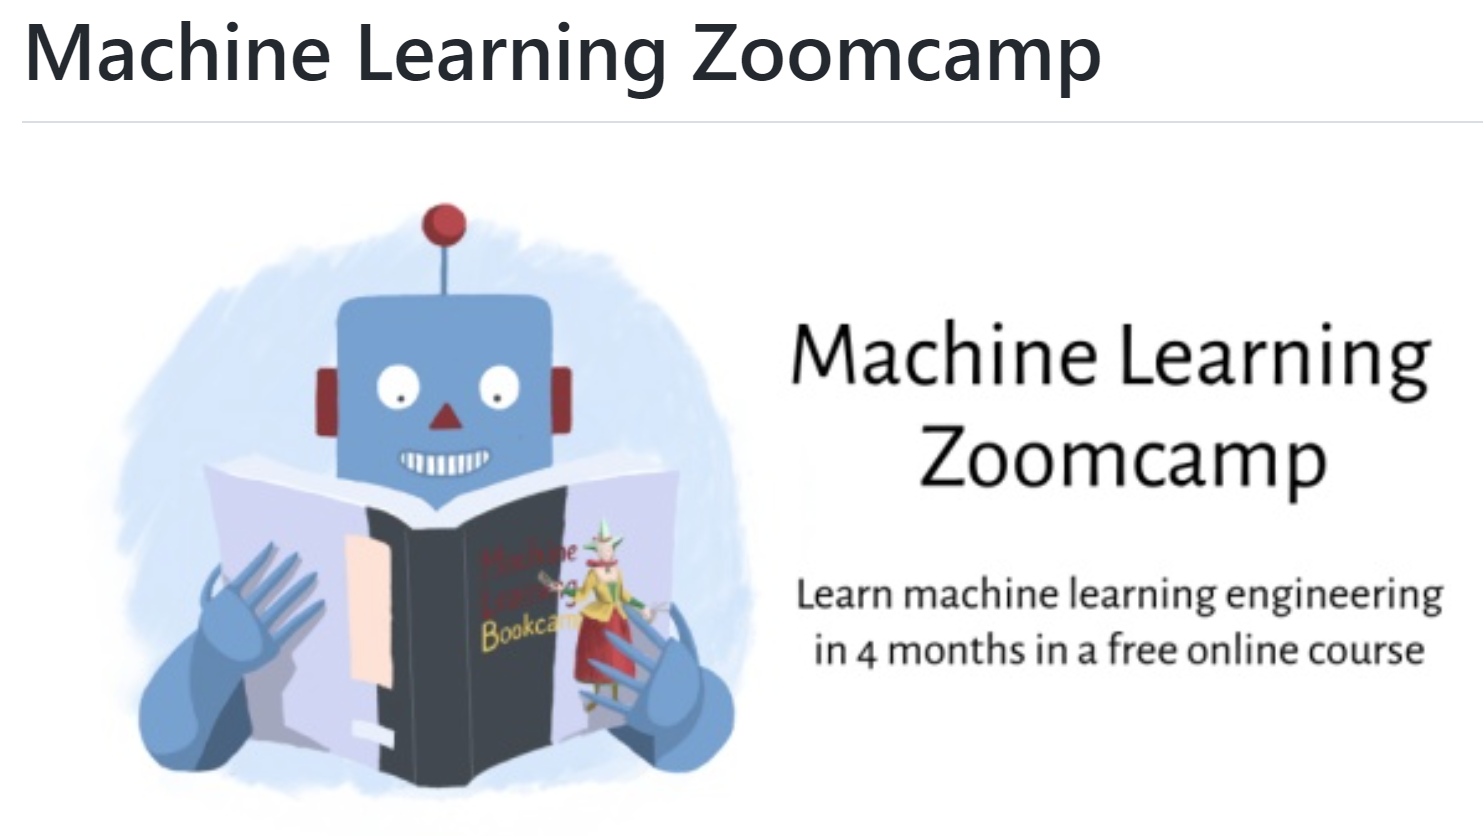

In [1]:
# Install libraries

# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

In [2]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Question 1

In [3]:
pd.__version__

'2.0.2'

In [4]:
housing_prices = pd.read_csv('California Housing Prices.csv')
housing_prices.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Question 2

How many columns are in the dataset?

In [5]:
housing_prices.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
housing_prices.shape

(20640, 10)

In [7]:
print(f'Answer is: {housing_prices.shape[1]}')

Answer is: 10


# Question 3

Which columns in the dataset have missing values?

In [8]:
housing_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing_prices.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

total_rooms has 207 NaN values

# Question 4

How many unique values does the ocean_proximity column have?

In [10]:
housing_prices.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [11]:
housing_prices['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

ocean_proximity has 5 unique values

# Question 5

What's the average value of the median_house_value for the houses located near the bay?

In [12]:
result_5 = housing_prices.median_house_value[housing_prices['ocean_proximity'] == 'NEAR BAY'].mean()
print(f'Average price for houses near the bay is {result_5:.0f}')

Average price for houses near the bay is 259212


# Question 6
1. Calculate the average of total_bedrooms column in the dataset.
2. Use the fillna method to fill the missing values in total_bedrooms with the mean value from the previous step.
3. Now, calculate the average of total_bedrooms again.
4. Has it changed?

Hint: take into account only 3 digits after the decimal point.

In [13]:
average_1 = np.round(housing_prices.total_bedrooms.mean(), 3)
average_1

537.871

In [14]:
average_2 = np.round(housing_prices.total_bedrooms.fillna(value=result_5).mean(), 3)
average_2

3132.135

Yes, average quantity of total_bedrooms has changed

# Question 7
1. Select all the options located on islands.
2. Select only columns housing_median_age, total_rooms, total_bedrooms.
3. Get the underlying NumPy array. Let's call it X.
4. Compute matrix-matrix multiplication between the transpose of X and X. To get the transpose, use X.T. Let's call the result XTX.
5. Compute the inverse of XTX.
6. Create an array y with values [950, 1300, 800, 1000, 1300].
7. Multiply the inverse of XTX with the transpose of X, and then multiply the result by y. Call the result w.
8. What's the value of the last element of w?

In [15]:
# Subtasks 1 and 2
islands = housing_prices[housing_prices['ocean_proximity'] == 'ISLAND']
islands = islands.loc[:, ['housing_median_age', 'total_rooms', 'total_bedrooms']]
islands

,housing_median_age,total_rooms,total_bedrooms
8314,27.0,1675.0,521.0
8315,52.0,2359.0,591.0
8316,52.0,2127.0,512.0
8317,52.0,996.0,264.0
8318,29.0,716.0,214.0


# [pandas.DataFrame.loc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)

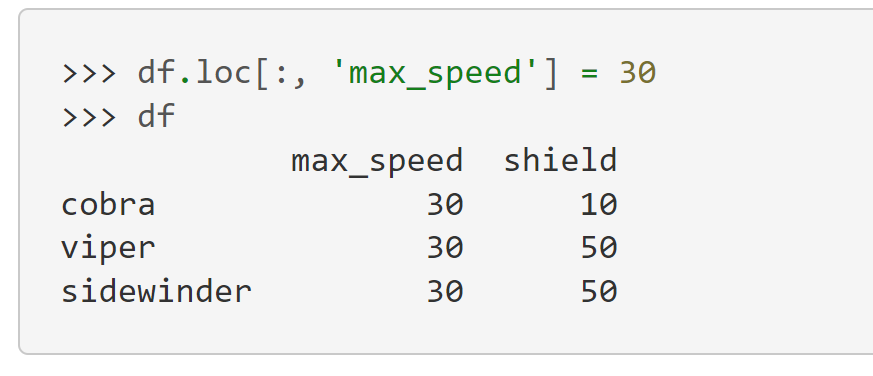

In [16]:
# Subtasks 3-9
X = islands.to_numpy() # Get the underlying NumPy array
XTX = X.T @ X
XTX_inv = np.linalg.inv(a=XTX)
y = np.array(object=[950, 1300, 800, 1000, 1300])
w = (XTX_inv @ X.T) @ y
print(f'Result is: {w[-1]:.4f}')

Result is: 5.6992


# [numpy.linalg.inv](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html)